<a href="https://colab.research.google.com/github/nikhil-nikss/DeepLearning/blob/main/Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading important packages

import cv2
from PIL import Image
import numpy as np
from keras.models import Sequential 
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import layers,optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras_preprocessing import image

In [2]:
# Loading inception net model

inception_model = InceptionV3(include_top = False , weights = 'imagenet' , input_shape=(256,256,3))

87916544/87910968 [==============================] - 1s 0us/step


In [3]:
# checking model summary

inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
# creating train and test

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
# converting to grey scale

x_train = x_train/255.0
x_test = x_test /255.0

In [6]:
# converting to categorical 

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [7]:
# checking shape of data

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
# adding custom layer on top of base inception model

model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(inception_model) # added inception base model to the midddle of our custom model
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))

In [9]:
# compile the model

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-6),loss = 'binary_crossentropy',metrics = ['acc'])

In [11]:
# fitting the model

model.fit(x_train,y_train,batch_size = 64,epochs=1,validation_data=(x_test,y_test))

782/782 [==============================] - 510s 652ms/step - loss: 0.7063 - acc: 0.5357 - val_loss: 0.5785 - val_acc: 0.7536


In [12]:
# saving our model

model.save("/content/inception_model.h5")

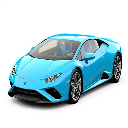

In [15]:
from matplotlib.pyplot import imshow
from google.colab.patches import cv2_imshow
from skimage import io

input_image = "lamborghini.jpg"
input_image = io.imread(input_image)
input_image = cv2.resize(input_image,dsize =(128,128),interpolation = cv2.INTER_CUBIC)
cv2_imshow(input_image)

In [24]:
# making predictions

input_image = cv2.resize(input_image,dsize =(32,32),interpolation = cv2.INTER_CUBIC)
x = image.img_to_array(input_image)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
pred = model.predict(x)
class_id = np.argmax(pred[0])
pred[0],class_id

(array([0.24005127, 0.05446463, 0.22395526, 0.06706463, 0.05576798,
        0.09670431, 0.06212935, 0.05209157, 0.08958814, 0.05818282],
       dtype=float32), 0)